# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [3]:
sinasc_a = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]
sinasc_a.head(5)

,munResNome,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,19,26.0
1,Alta Floresta D'Oeste,29,24.0
2,Alta Floresta D'Oeste,37,32.0
3,Alto Alegre dos Parecis,30,24.0
4,Alta Floresta D'Oeste,30,27.0


Como podemos ver abaixo, a variável `IDADEPAI` possui a maior parte dos dados como faltantes, por isso irei remover essas linhas.

In [4]:
sinasc_a.isna().sum()

munResNome        0
IDADEMAE          0
IDADEPAI      19421
dtype: int64

In [5]:
sinasc_a = sinasc_a.dropna()
sinasc_a.shape

(7607, 3)

Como podemos ver abaixo, a média das idades do pai é superior na maior parte dos munícipios.

<AxesSubplot:>

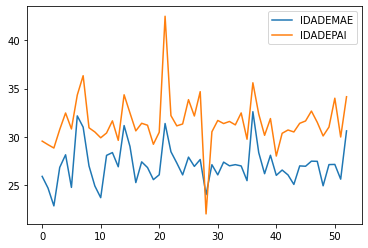

In [6]:
mun = sinasc_a.groupby('munResNome')
mun.mean().plot(use_index=False)
# o use_index=False foi usado para não deixar os ticks x muito poluídos

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [7]:
sinasc_b = sinasc_raw[['ESCMAE' ,'DTNASC', 'SEXO', 'PESO']]
sinasc_b.isna().sum()

ESCMAE    312
DTNASC      0
SEXO        4
PESO        0
dtype: int64

Novamente o DataFrame possuí dados faltantes, então irei remove-los:

In [8]:
sinasc_b = sinasc_b.dropna()
sinasc_b.shape

(26712, 4)

In [9]:
sinasc_b.isna().sum()

ESCMAE    0
DTNASC    0
SEXO      0
PESO      0
dtype: int64

In [10]:
sinasc_aniversario = sinasc_b.loc[sinasc_b['DTNASC'] == '2019-08-29']

In [11]:
sinasc_aniversario

,ESCMAE,DTNASC,SEXO,PESO
13772,8 a 11 anos,2019-08-29,Feminino,2885
14072,8 a 11 anos,2019-08-29,Masculino,3055
14073,4 a 7 anos,2019-08-29,Feminino,3350
14097,8 a 11 anos,2019-08-29,Masculino,3180
14125,4 a 7 anos,2019-08-29,Masculino,3150
...,...,...,...,...
25318,8 a 11 anos,2019-08-29,Masculino,4370
25319,8 a 11 anos,2019-08-29,Masculino,2800
25320,12 anos ou mais,2019-08-29,Masculino,2360
26298,8 a 11 anos,2019-08-29,Feminino,3325


Abaixo um comparativo entre ambos os sexos dividios pela variável `ESCMAE`. 

<AxesSubplot:xlabel='ESCMAE', ylabel='PESO'>

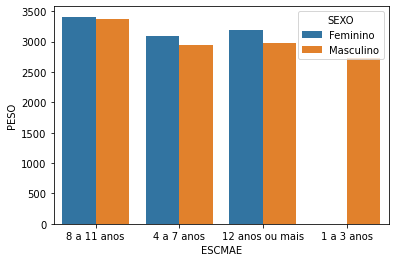

In [12]:
sns.barplot(data=sinasc_aniversario, x='ESCMAE', y = 'PESO',  hue='SEXO', ci=False)

Utilizando o método `groupby` chegamos aos mesmos valores que o demonstrado acima com o gráfico:

In [13]:
fem = sinasc_aniversario[sinasc_aniversario['SEXO'] == 'Feminino'].groupby('ESCMAE').mean()
fem

,PESO
ESCMAE,
12 anos ou mais,3197.000000
4 a 7 anos,3098.812500
8 a 11 anos,3409.826087


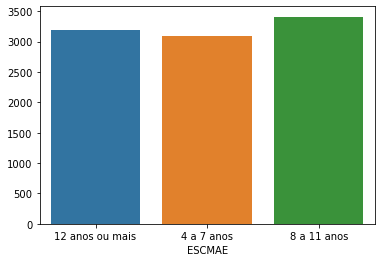

In [14]:
fem_graph = sns.barplot(data=fem.T)

In [15]:
masc = sinasc_aniversario[sinasc_aniversario['SEXO'] == 'Masculino'].groupby('ESCMAE').mean()
masc

,PESO
ESCMAE,
1 a 3 anos,2730.000000
12 anos ou mais,2985.000000
4 a 7 anos,2945.000000
8 a 11 anos,3368.166667


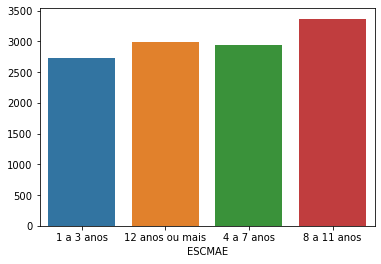

In [16]:
masc_graph = sns.barplot(data=masc.T)

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [17]:
mun.count().sort_values(by='IDADEMAE').head(5)

,IDADEMAE,IDADEPAI
munResNome,,
Rio Crespo,1,1
Município ignorado - RO,1,1
Pimenteiras do Oeste,5,5
Alto Paraíso,6,6
Cabixi,6,6


In [18]:
rio_crespo = sinasc_a[sinasc_a['munResNome'] == 'Rio Crespo'].groupby('munResNome')

In [19]:
rio_crespo.agg(['mean', 'min', 'max'])

IDADEMAE         IDADEPAI            
               mean min max     mean   min   max
munResNome                                      
Rio Crespo     26.0  26  26     28.0  28.0  28.0

Como podemos ver, por possuir apenas um registro a análise não fica interessante, por isso vou pegar o município Cujubim, o qual teve 10 nascimentos no ano de 2019:

In [20]:
cujubim = sinasc_a[sinasc_a['munResNome'] == 'Cujubim'].groupby('munResNome')

In [21]:
cujubim.agg(['mean', 'min', 'max'])

IDADEMAE         IDADEPAI            
               mean min max     mean   min   max
munResNome                                      
Cujubim        27.4  17  37     31.4  19.0  44.0

Assim podemos ver algumas diferenças notáveis, como por exemplo a diferença miníma ser menor do que a diferença máxima (2 e 7 anos respectivamente).

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



Com a célula de códigos abaixo criei outro DataFrame e adicionei uma variável com o mês de nascimento, sendo `1 = janeiro` e ``12 = dezembro``.

In [22]:
sinasc_mes = sinasc_raw.copy()
sinasc_mes.loc[:,'DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])
sinasc_mes.set_index('DTNASC', inplace=True)
sinasc_mes['MESNASC'] = sinasc_mes.index.month
sinasc_mes['MESNASC'].value_counts()

3     2456
4     2373
5     2365
9     2357
10    2270
1     2263
8     2199
6     2176
7     2160
11    2148
12    2136
2     2125
Name: MESNASC, dtype: int64

O munícipio com mais nascimentos no mês de março foi Porto Velho.

In [23]:
sinasc_março = sinasc_mes.loc[sinasc_mes['MESNASC'] == 3]
sinasc_março.munResNome.value_counts()

Porto Velho                  744
Ji-Paraná                    188
Vilhena                      148
Ariquemes                    141
Cacoal                       133
Jaru                          80
Guajará-Mirim                 75
Rolim de Moura                69
Ouro Preto do Oeste           67
Pimenta Bueno                 62
Buritis                       59
Nova Mamoré                   53
Machadinho D'Oeste            44
Espigão D'Oeste               44
São Miguel do Guaporé         41
Candeias do Jamari            33
São Francisco do Guaporé      31
Alta Floresta D'Oeste         31
Presidente Médici             29
Costa Marques                 24
Alto Paraíso                  22
Alvorada D'Oeste              22
Monte Negro                   20
Nova Brasilândia D'Oeste      20
Seringueiras                  19
Colorado do Oeste             19
Chupinguaia                   18
Cujubim                       17
Cerejeiras                    16
Urupá                         14
Vale do Pa

In [24]:
porto_velho = sinasc_março[sinasc_março['munResNome'] == 'Porto Velho'].groupby('munResNome')

In [25]:
porto_velho['QTDFILVIVO'].agg(['mean', 'max', 'min'])

,mean,max,min
munResNome,,,
Porto Velho,1.295056,9.0,0.0


In [26]:
porto_velho['IDADEPAI'].agg(['mean', 'max', 'min'])

,mean,max,min
munResNome,,,
Porto Velho,34.629032,62.0,19.0


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [27]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [28]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [29]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

### Analisando as variáveis achei interessante ver se tem alguma relação entre o tempo de gestação e a maneira em como foi o parto (`cesáreo` ou `vaginal`). Mais afundo, tentei ver a relação que as variáveis `IDADEMAE` e `PESO` podem ter com o fato de um nascimento prematuro.

Comecei criando um novo DataFrame e removendo os dados faltantes.

In [30]:
sinasc_d = sinasc_raw[['IDADEMAE' ,'GESTACAO', 'PARTO', 'PESO']]
sinasc_d.isna().sum()

IDADEMAE       0
GESTACAO    1232
PARTO         49
PESO           0
dtype: int64

In [31]:
sinasc_d = sinasc_d.dropna()
sinasc_d.shape

(25758, 4)

Resolvi criar uma nova variável, onde indica se o bebê nasceu prematuramente. Um bebê é considerado prematudo quando nasceu antes de 37 semanas de gestação. 

In [32]:
prematuro = ['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', '32 a 36 semanas']
nao_prematuro = ['42 semanas e mais', '37 a 41 semanas']

Com os loops abaixo foi definida a nova variável, `PREMATUDO`, onde `y` representa que o nascimento foi prematuro, e `n` não.

In [33]:
for i in prematuro:
    sinasc_d.loc[sinasc_d['GESTACAO'] == (i), 'PREMATURO'] = 'y'

for i in nao_prematuro:
    sinasc_d.loc[sinasc_d['GESTACAO'] == (i), 'PREMATURO'] = 'n'    

Apenas analisando a média do peso entre prematuros ou não notamos uma diferença mepdia de cerca de 800 gramas, uma diferença considerável.

In [34]:
sinasc_d.groupby('PREMATURO')['PESO'].mean()

PREMATURO
n    3316.643075
y    2580.621751
Name: PESO, dtype: float64

Já analisando a relação entre prematuros e o tipo de parto, não vemos muita diferença.

<AxesSubplot:xlabel='PREMATURO'>

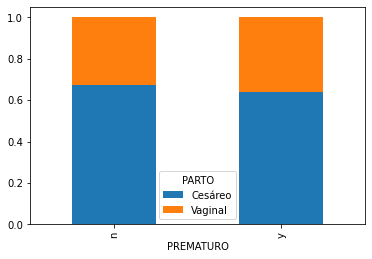

In [38]:
(pd.crosstab(sinasc_d['PREMATURO'], sinasc_d['PARTO'],
             normalize='index')
.plot.bar(stacked=True))

Comparando o peso com prematuros ou não, vemos abaixo uma diferença gráfica notável que se repete como antes. Também se repete essa diferença quase nula entre os tipos de parto (Cesáreo e Vaginal)

<AxesSubplot:xlabel='PARTO', ylabel='PESO'>

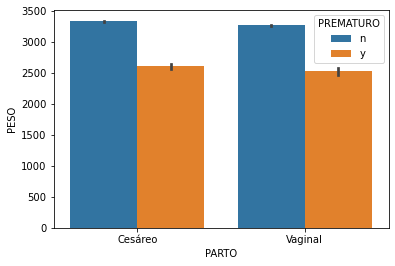

In [39]:
sns.barplot(data=sinasc_d, x='PARTO', y='PESO', hue='PREMATURO')

Pra aliar todas as variáveis, fiz esse `relplot` para análise, que segue abaixo do plot.

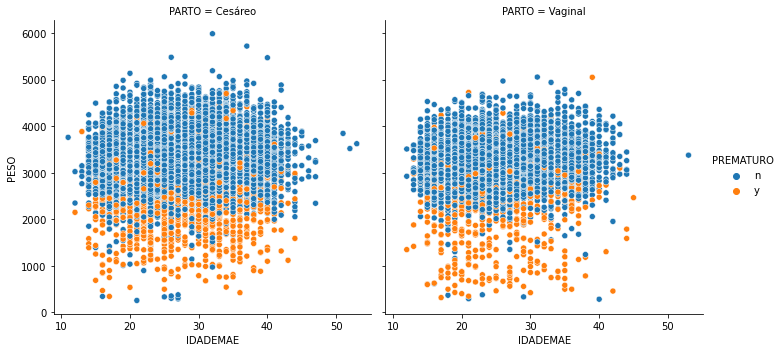

In [40]:
sns.relplot(data=sinasc_d, x='IDADEMAE', y='PESO', hue='PREMATURO', col='PARTO')

Podemos confirmar o que já foi visto:
- De cara vemos uma diferença notável entre os pesos de prematuros e não prematuros, sendo respectivamente representados pelas cores laranja e azul.
- Vemos também que a diferença entre os tipos de parto é pequena, sendo na esquerda o parto com cesárea e à direita parto vaginal.
- O último ponto, agora novo: a variável que foi pouco explorada até agora nessa pequena análise, `IDADEMAE`, se mostrou uniforme entre os tipos de parto. 

Para concluir, confesso que achei que a idade da mãe influenciaria um pouco no tipo de parto, isso por mães muito novas ou muitos velhas puderem apresentar complicações devido ao seu corpo. Também achei que quanto menor o tempo de gestação, a probabilidade e frequência de partos com cesariana iria ser maior, porém não foi o caso. 